<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries</a></span></li><li><span><a href="#Read-in-data" data-toc-modified-id="Read-in-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Read in data</a></span></li><li><span><a href="#Transfer-Learning" data-toc-modified-id="Transfer-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#EDA-and-Data-Cleaning" data-toc-modified-id="EDA-and-Data-Cleaning-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>EDA and Data Cleaning</a></span></li></ul></li><li><span><a href="#Model-Preparation" data-toc-modified-id="Model-Preparation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Preparation</a></span></li><li><span><a href="#Train,-Test-Split" data-toc-modified-id="Train,-Test-Split-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train, Test Split</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Check-distributions-of-Y-to-see-if-we-have-balanced-classes" data-toc-modified-id="Check-distributions-of-Y-to-see-if-we-have-balanced-classes-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Check distributions of Y to see if we have balanced classes</a></span></li></ul></li></ul></li><li><span><a href="#Modeling:-First-Round" data-toc-modified-id="Modeling:-First-Round-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modeling: First Round</a></span><ul class="toc-item"><li><span><a href="#Evaluation-Metric" data-toc-modified-id="Evaluation-Metric-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Evaluation Metric</a></span></li><li><span><a href="#Baseline-Model" data-toc-modified-id="Baseline-Model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Baseline Model</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#KNN-model" data-toc-modified-id="KNN-model-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>KNN model</a></span></li><li><span><a href="#Trees" data-toc-modified-id="Trees-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Trees</a></span><ul class="toc-item"><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-6.5.1"><span class="toc-item-num">6.5.1&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Bagging-Classifier" data-toc-modified-id="Bagging-Classifier-6.5.2"><span class="toc-item-num">6.5.2&nbsp;&nbsp;</span>Bagging Classifier</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-6.5.3"><span class="toc-item-num">6.5.3&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#Voting-Classifier" data-toc-modified-id="Voting-Classifier-6.5.4"><span class="toc-item-num">6.5.4&nbsp;&nbsp;</span>Voting Classifier</a></span></li><li><span><a href="#SVM" data-toc-modified-id="SVM-6.5.5"><span class="toc-item-num">6.5.5&nbsp;&nbsp;</span>SVM</a></span></li></ul></li></ul></li><li><span><a href="#Model-Selection" data-toc-modified-id="Model-Selection-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Model Selection</a></span><ul class="toc-item"><li><span><a href="#Define-functions-that-will-generate-and-display-AUC-ROC-scores-for-all-the-models" data-toc-modified-id="Define-functions-that-will-generate-and-display-AUC-ROC-scores-for-all-the-models-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Define functions that will generate and display AUC ROC scores for all the models</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#ROC-Curve-and-AUC-ROC" data-toc-modified-id="ROC-Curve-and-AUC-ROC-7.2.2"><span class="toc-item-num">7.2.2&nbsp;&nbsp;</span>ROC Curve and AUC ROC</a></span></li></ul></li></ul></li></ul></div>

# Import libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

from sklearn.metrics import confusion_matrix, roc_curve, auc, make_scorer, roc_auc_score

# Styling 
from IPython.display import HTML, display
import tabulate

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

# Read in data

In [2]:
yelp = pd.read_csv('./../../data/yelp_cleaned.csv')

In [3]:
yelp.head()

,Unnamed: 0,id,alias,name,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,distance,price1,cat1,cat2,latitude,longitude,zip_code,state,city,nyc,manhattan,brooklyn,staten_island,bronx,queens,borough,merclong,merclat
0,0,C3spvfEd8JQJie-yixRgpQ,com-tam-ninh-kieu-bronx,Com Tam Ninh Kieu,False,https://www.yelp.com/biz/com-tam-ninh-kieu-bro...,379,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.0,"{'latitude': 40.86702, 'longitude': -73.8982}","['delivery', 'pickup']",2,"{'address1': '2641 Jerome Ave', 'address2': ''...",8219.141546,$$,vietnamese,Vietnamese,40.867020,-73.898200,10468,NY,Bronx,True,False,False,False,True,False,bronx,-8.226310e+06,4.992747e+06
1,1,b6jOwyX4iaagw8YjXqq1sA,antonios-trattoria-bronx,Antonio's Trattoria,False,https://www.yelp.com/biz/antonios-trattoria-br...,773,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"{'latitude': 40.854131, 'longitude': -73.886601}",[],2,"{'address1': '2370 Belmont Ave', 'address2': N...",1273.311721,$$,italian,Italian,40.854131,-73.886601,10458,NY,Bronx,True,False,False,False,True,False,bronx,-8.225019e+06,4.990850e+06
2,2,ciHt5n5rmpby1YcC_6JVrg,bronx-alehouse-bronx-2,Bronx Alehouse,False,https://www.yelp.com/biz/bronx-alehouse-bronx-...,749,"[{'alias': 'tradamerican', 'title': 'American ...",4.0,"{'latitude': 40.8847016520226, 'longitude': -7...",[],2,"{'address1': '216 W 238th St', 'address2': '',...",9528.584185,$$,tradamerican,American (Traditional),40.884702,-73.899498,10463,NY,Bronx,True,False,False,False,True,False,bronx,-8.226454e+06,4.995350e+06
3,4,KAxYFGyOQ7ysCmYmh8jKtw,the-bronx-public-bronx,The Bronx Public,False,https://www.yelp.com/biz/the-bronx-public-bron...,443,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",4.0,"{'latitude': 40.87827, 'longitude': -73.90341}","['restaurant_reservation', 'delivery', 'pickup']",2,"{'address1': '170 W 231st St', 'address2': '',...",9315.419234,$$,sportsbars,Sports Bars,40.878270,-73.903410,10463,NY,Bronx,True,False,False,False,True,False,bronx,-8.226890e+06,4.994403e+06
4,5,tLZfepIfSf0a80zHQTbTGQ,trattoria-zero-otto-nove-bronx,Trattoria Zero Otto Nove,False,https://www.yelp.com/biz/trattoria-zero-otto-n...,749,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,"{'latitude': 40.8546515, 'longitude': -73.8883...",[],2,"{'address1': '2357 Arthur Ave', 'address2': ''...",1200.986458,$$,italian,Italian,40.854652,-73.888353,10458,NY,Bronx,True,False,False,False,True,False,bronx,-8.225214e+06,4.990926e+06


# Transfer Learning

In [4]:
yelp_clusters = pd.read_csv('./../../data/cluster_zip_2.csv')

In [5]:
# Turn dataframe into a dictionary
cluster_dict = dict(zip(yelp_clusters['zipcode'], yelp_clusters['cluster']))

In [6]:
yelp.columns

Index(['Unnamed: 0', 'id', 'alias', 'name', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'distance', 'price1', 'cat1', 'cat2', 'latitude',
       'longitude', 'zip_code', 'state', 'city', 'nyc', 'manhattan',
       'brooklyn', 'staten_island', 'bronx', 'queens', 'borough', 'merclong',
       'merclat'],
      dtype='object')

In [7]:
yelp['cluster'] = [cluster_dict[zipcode] for zipcode in yelp['zip_code']]

In [8]:
yelp.head()

,Unnamed: 0,id,alias,name,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,distance,price1,cat1,cat2,latitude,longitude,zip_code,state,city,nyc,manhattan,brooklyn,staten_island,bronx,queens,borough,merclong,merclat,cluster
0,0,C3spvfEd8JQJie-yixRgpQ,com-tam-ninh-kieu-bronx,Com Tam Ninh Kieu,False,https://www.yelp.com/biz/com-tam-ninh-kieu-bro...,379,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.0,"{'latitude': 40.86702, 'longitude': -73.8982}","['delivery', 'pickup']",2,"{'address1': '2641 Jerome Ave', 'address2': ''...",8219.141546,$$,vietnamese,Vietnamese,40.867020,-73.898200,10468,NY,Bronx,True,False,False,False,True,False,bronx,-8.226310e+06,4.992747e+06,23
1,1,b6jOwyX4iaagw8YjXqq1sA,antonios-trattoria-bronx,Antonio's Trattoria,False,https://www.yelp.com/biz/antonios-trattoria-br...,773,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"{'latitude': 40.854131, 'longitude': -73.886601}",[],2,"{'address1': '2370 Belmont Ave', 'address2': N...",1273.311721,$$,italian,Italian,40.854131,-73.886601,10458,NY,Bronx,True,False,False,False,True,False,bronx,-8.225019e+06,4.990850e+06,23
2,2,ciHt5n5rmpby1YcC_6JVrg,bronx-alehouse-bronx-2,Bronx Alehouse,False,https://www.yelp.com/biz/bronx-alehouse-bronx-...,749,"[{'alias': 'tradamerican', 'title': 'American ...",4.0,"{'latitude': 40.8847016520226, 'longitude': -7...",[],2,"{'address1': '216 W 238th St', 'address2': '',...",9528.584185,$$,tradamerican,American (Traditional),40.884702,-73.899498,10463,NY,Bronx,True,False,False,False,True,False,bronx,-8.226454e+06,4.995350e+06,58
3,4,KAxYFGyOQ7ysCmYmh8jKtw,the-bronx-public-bronx,The Bronx Public,False,https://www.yelp.com/biz/the-bronx-public-bron...,443,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",4.0,"{'latitude': 40.87827, 'longitude': -73.90341}","['restaurant_reservation', 'delivery', 'pickup']",2,"{'address1': '170 W 231st St', 'address2': '',...",9315.419234,$$,sportsbars,Sports Bars,40.878270,-73.903410,10463,NY,Bronx,True,False,False,False,True,False,bronx,-8.226890e+06,4.994403e+06,58
4,5,tLZfepIfSf0a80zHQTbTGQ,trattoria-zero-otto-nove-bronx,Trattoria Zero Otto Nove,False,https://www.yelp.com/biz/trattoria-zero-otto-n...,749,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,"{'latitude': 40.8546515, 'longitude': -73.8883...",[],2,"{'address1': '2357 Arthur Ave', 'address2': ''...",1200.986458,$$,italian,Italian,40.854652,-73.888353,10458,NY,Bronx,True,False,False,False,True,False,bronx,-8.225214e+06,4.990926e+06,23


In [9]:
cluster_is_affluent = pd.read_csv('./../../data/cluster_is_affluent.csv')

In [10]:
cluster_is_affluent.head()

,cluster,is_affluent
0,0,1
1,1,0
2,2,1
3,3,1
4,4,0


In [11]:
cluster_is_affluent_dict = dict(zip(cluster_is_affluent['cluster'], cluster_is_affluent['is_affluent']))

In [12]:
yelp['is_affluent'] = [cluster_is_affluent_dict[cluster] for cluster in yelp['cluster']]

## EDA and Data Cleaning

In [13]:
yelp.head()

,Unnamed: 0,id,alias,name,is_closed,url,review_count,categories,rating,coordinates,transactions,price,location,distance,price1,cat1,cat2,latitude,longitude,zip_code,state,city,nyc,manhattan,brooklyn,staten_island,bronx,queens,borough,merclong,merclat,cluster,is_affluent
0,0,C3spvfEd8JQJie-yixRgpQ,com-tam-ninh-kieu-bronx,Com Tam Ninh Kieu,False,https://www.yelp.com/biz/com-tam-ninh-kieu-bro...,379,"[{'alias': 'vietnamese', 'title': 'Vietnamese'...",4.0,"{'latitude': 40.86702, 'longitude': -73.8982}","['delivery', 'pickup']",2,"{'address1': '2641 Jerome Ave', 'address2': ''...",8219.141546,$$,vietnamese,Vietnamese,40.867020,-73.898200,10468,NY,Bronx,True,False,False,False,True,False,bronx,-8.226310e+06,4.992747e+06,23,0
1,1,b6jOwyX4iaagw8YjXqq1sA,antonios-trattoria-bronx,Antonio's Trattoria,False,https://www.yelp.com/biz/antonios-trattoria-br...,773,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.5,"{'latitude': 40.854131, 'longitude': -73.886601}",[],2,"{'address1': '2370 Belmont Ave', 'address2': N...",1273.311721,$$,italian,Italian,40.854131,-73.886601,10458,NY,Bronx,True,False,False,False,True,False,bronx,-8.225019e+06,4.990850e+06,23,0
2,2,ciHt5n5rmpby1YcC_6JVrg,bronx-alehouse-bronx-2,Bronx Alehouse,False,https://www.yelp.com/biz/bronx-alehouse-bronx-...,749,"[{'alias': 'tradamerican', 'title': 'American ...",4.0,"{'latitude': 40.8847016520226, 'longitude': -7...",[],2,"{'address1': '216 W 238th St', 'address2': '',...",9528.584185,$$,tradamerican,American (Traditional),40.884702,-73.899498,10463,NY,Bronx,True,False,False,False,True,False,bronx,-8.226454e+06,4.995350e+06,58,0
3,4,KAxYFGyOQ7ysCmYmh8jKtw,the-bronx-public-bronx,The Bronx Public,False,https://www.yelp.com/biz/the-bronx-public-bron...,443,"[{'alias': 'sportsbars', 'title': 'Sports Bars...",4.0,"{'latitude': 40.87827, 'longitude': -73.90341}","['restaurant_reservation', 'delivery', 'pickup']",2,"{'address1': '170 W 231st St', 'address2': '',...",9315.419234,$$,sportsbars,Sports Bars,40.878270,-73.903410,10463,NY,Bronx,True,False,False,False,True,False,bronx,-8.226890e+06,4.994403e+06,58,0
4,5,tLZfepIfSf0a80zHQTbTGQ,trattoria-zero-otto-nove-bronx,Trattoria Zero Otto Nove,False,https://www.yelp.com/biz/trattoria-zero-otto-n...,749,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",4.0,"{'latitude': 40.8546515, 'longitude': -73.8883...",[],2,"{'address1': '2357 Arthur Ave', 'address2': ''...",1200.986458,$$,italian,Italian,40.854652,-73.888353,10458,NY,Bronx,True,False,False,False,True,False,bronx,-8.225214e+06,4.990926e+06,23,0


In [14]:
yelp.columns

Index(['Unnamed: 0', 'id', 'alias', 'name', 'is_closed', 'url', 'review_count',
       'categories', 'rating', 'coordinates', 'transactions', 'price',
       'location', 'distance', 'price1', 'cat1', 'cat2', 'latitude',
       'longitude', 'zip_code', 'state', 'city', 'nyc', 'manhattan',
       'brooklyn', 'staten_island', 'bronx', 'queens', 'borough', 'merclong',
       'merclat', 'cluster', 'is_affluent'],
      dtype='object')

In [15]:
borough_cols = ['manhattan', 'brooklyn', 'staten_island', 'bronx', 'queens']
for i in borough_cols:
    yelp[i] = [1 if i == True else 0 for i in yelp[i]]

In [16]:
columns_to_keep = ['review_count', 'rating', 'price', 'cat1', 'is_affluent']
yelp = yelp[columns_to_keep]

In [17]:
def dummify_categorical_columns(df):
    '''
    Dummify all categorical columns
    '''
    categorical_columns = df.select_dtypes(include="object").columns
    return pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [18]:
yelp = dummify_categorical_columns(yelp)

In [19]:
yelp.head()

,review_count,rating,price,is_affluent,cat1_afghani,cat1_african,cat1_airportlounges,cat1_arcades,cat1_argentine,cat1_armenian,cat1_artmuseums,cat1_asianfusion,cat1_australian,cat1_austrian,cat1_bagels,cat1_bakeries,cat1_bangladeshi,cat1_barbers,cat1_bars,cat1_basque,cat1_bbq,cat1_beer_and_wine,cat1_beerbar,cat1_beergardens,cat1_belgian,cat1_boating,cat1_bookstores,cat1_bowling,cat1_boxing,cat1_brasseries,cat1_brazilian,cat1_breakfast_brunch,cat1_breweries,cat1_british,cat1_bubbletea,cat1_buffets,cat1_burgers,cat1_burmese,cat1_butcher,cat1_cafes,cat1_cafeteria,cat1_cajun,cat1_cakeshop,cat1_cambodian,cat1_candy,cat1_cantonese,cat1_caribbean,cat1_catering,cat1_champagne_bars,cat1_cheese,cat1_cheesesteaks,cat1_chicken_wings,cat1_chickenshop,cat1_chinese,cat1_chocolate,cat1_cigarbars,cat1_cocktailbars,cat1_coffee,cat1_coffeeroasteries,cat1_colombian,cat1_comedyclubs,cat1_comfortfood,cat1_convenience,cat1_cookingclasses,cat1_cookingschools,cat1_creperies,cat1_cuban,cat1_culturalcenter,cat1_cupcakes,cat1_customcakes,cat1_czech,cat1_danceclubs,cat1_delis,cat1_desserts,cat1_dimsum,cat1_diners,cat1_distilleries,cat1_divebars,cat1_diyfood,cat1_dominican,cat1_donuts,cat1_drugstores,cat1_eatertainment,cat1_egyptian,cat1_empanadas,cat1_ethiopian,cat1_eventplanning,cat1_falafel,cat1_farmersmarket,cat1_festivals,cat1_filipino,cat1_fishnchips,cat1_florists,cat1_fondue,cat1_food,cat1_food_court,cat1_fooddeliveryservices,cat1_foodstands,cat1_foodtrucks,cat1_french,cat1_galleries,cat1_gastropubs,cat1_gaybars,cat1_gelato,cat1_georgian,cat1_german,cat1_giftshops,cat1_gluten_free,cat1_golf,cat1_golflessons,cat1_gourmet,cat1_greek,cat1_grocery,cat1_hair,cat1_haitian,cat1_halal,cat1_hawaiian,cat1_healthmarkets,cat1_herbsandspices,cat1_himalayan,cat1_hkcafe,cat1_hobbyshops,cat1_hookah_bars,cat1_hotdog,cat1_hotdogs,cat1_hotels,cat1_hotpot,cat1_hungarian,cat1_icecream,cat1_indonesian,cat1_indpak,cat1_intlgrocery,cat1_irish,cat1_irish_pubs,cat1_italian,cat1_izakaya,cat1_japacurry,cat1_japanese,cat1_jazzandblues,cat1_juicebars,cat1_karaoke,cat1_kebab,cat1_kids_activities,cat1_kitchenandbath,cat1_korean,cat1_kosher,cat1_landmarks,cat1_laotian,cat1_latin,cat1_laundromat,cat1_lebanese,cat1_localservices,cat1_lounges,cat1_macarons,cat1_magicians,cat1_mags,cat1_malaysian,cat1_markets,cat1_meats,cat1_mediterranean,cat1_mexican,cat1_mideastern,cat1_modern_european,cat1_mongolian,cat1_moroccan,cat1_movietheaters,cat1_museums,cat1_musicvenues,cat1_musicvideo,cat1_newamerican,cat1_newmexican,cat1_nightlife,cat1_nonprofit,cat1_noodles,cat1_organic_stores,cat1_pakistani,cat1_panasian,cat1_pastashops,cat1_persian,cat1_peruvian,cat1_petstore,cat1_pianobars,cat1_pizza,cat1_poke,cat1_polish,cat1_poolhalls,cat1_popuprestaurants,cat1_portuguese,cat1_pretzels,cat1_publicmarkets,cat1_pubs,cat1_puertorican,cat1_ramen,cat1_restaurants,cat1_russian,cat1_salad,cat1_salvadoran,cat1_sandwiches,cat1_scandinavian,cat1_seafood,cat1_seafoodmarkets,cat1_senegalese,cat1_servicestations,cat1_shanghainese,cat1_sharedofficespaces,cat1_shavedice,cat1_shopping,cat1_shoppingcenters,cat1_sicilian,cat1_singaporean,cat1_skate_parks,cat1_soulfood,cat1_soup,cat1_southafrican,cat1_southern,cat1_spanish,cat1_spas,cat1_speakeasies,cat1_sportgoods,cat1_sports_clubs,cat1_sportsbars,cat1_sportswear,cat1_srilankan,cat1_steak,cat1_streetvendors,cat1_supperclubs,cat1_sushi,cat1_szechuan,cat1_tacos,cat1_taiwanese,cat1_tapas,cat1_tapasmallplates,cat1_tattoo,cat1_tea,cat1_teppanyaki,cat1_tex-mex,cat1_thai,cat1_theater,cat1_themedcafes,cat1_tikibars,cat1_tobaccoshops,cat1_tours,cat1_tradamerican,cat1_trinidadian,cat1_turkish,cat1_tuscan,cat1_ukrainian,cat1_uzbek,cat1_vapeshops,cat1_vegan,cat1_vegetarian,cat1_venezuelan,cat1_venues,cat1_vietnamese,cat1_vinyl_records,cat1_waffles,cat1_whiskeybars,cat1_wine_bars,cat1_wraps
0,379,4.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [20]:
yelp.shape

(19830, 259)

# Model Preparation

In [21]:
target = 'is_affluent'
X = yelp.drop(columns=target)
y = yelp[target]

# Train, Test Split
1. Since our dataset is large enough, we will reserve 20% of the data as test data. 
2. We will use 'stratify = y' to ensure the classes of y are balanced in both train and test.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

### Check distributions of Y to see if we have balanced classes

In [23]:
# Check distribution of y, to see if y has unblanced classes
y.value_counts(normalize=True)

1    0.687998
0    0.312002
Name: is_affluent, dtype: float64

In [24]:
# Check distribution of y_train
y_train.value_counts(normalize=True)

1    0.687973
0    0.312027
Name: is_affluent, dtype: float64

In [25]:
# Check distribution of y_test
y_test.value_counts(normalize=True)

1    0.688099
0    0.311901
Name: is_affluent, dtype: float64

# Modeling: First Round

- In the modeling process, I will first present my baseline model.  
- I will then develop 4 major categories of models: Naive Bayes Models (Multinomial and Gaussian), Logistic Regression Models, KNN model, and SVM. 
- Based on the grid search's cross validation score, I will then fine tune the hyper-parameters for each model to achieve the optimal result. 

## Evaluation Metric

- Before I go into developing the models, I will briefly discuss the evaluation metric: AUC ROC. 

- "ROC (Receiver Operating Characteristic) is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes"[(reference)](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5). The higher the ROC, and the better it seperates the two classes r/startrek and r/StarWars. The ROC curve is plotted with True Positive Rate on y-aixs, against the False Positive Rate on the x-axis.

- AUC (Area Under the Curve) measures the entire two-dimensional area underneath the entire ROC curve. The closer AUC to 1, the better the model.

- I choose AUC ROC since I aim to find the optimal model that can separate the two classes r/startrek and r/StarWars really well. 

- I will also consider the amount of time each model take to fit. If two models have similar AUC ROC scores, the one that runs faster will be the model we choose. 

##  Baseline Model

In [26]:
y_test.value_counts(normalize=True)[1]

0.6880988401412002

## Logistic Regression

In [27]:
pipe = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('lr', LogisticRegression(solver='liblinear'))
])

pipe_params ={
    'lr__C': [0.0001, 1],
    'lr__penalty' : ['l1', 'l2']
    }

gs_lr = GridSearchCV(pipe, 
                     pipe_params, 
                     cv=5,
                     scoring='roc_auc')


In [28]:
gs_lr.fit(X_train, y_train);

In [29]:
# Check the optimal params
gs_lr.best_params_

{'lr__C': 1, 'lr__penalty': 'l1'}

In [30]:
# Train score
gs_lr.score(X_train, y_train)

0.7481927021729111

In [31]:
# Cross val score on the whole dataset 
cross_val_score(gs_lr.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.7061477456217414

In [32]:
# Test score
gs_lr.score(X_test, y_test)

0.7213430820141046

## KNN model

In [33]:
# Pipe line: CountVectorizer() + LogisticRegression
pipe_knn = Pipeline(steps=[
    ('ss', StandardScaler()),  
    ('knn', KNeighborsClassifier())
])

pipe_params_knn ={
    'knn__n_neighbors' : [30, 50, 70, 90, 110]
    
}

gs_knn = GridSearchCV(pipe_knn, 
                      pipe_params_knn, 
                      cv=5,
                      scoring='roc_auc')

In [34]:
gs_knn.fit(X_train, y_train);

In [35]:
# Check the optimal params
gs_knn.best_params_

{'knn__n_neighbors': 30}

In [36]:
# Train score
gs_knn.score(X_train, y_train)

0.7660226786834813

In [37]:
# Cross val score on the whole dataset 
cross_val_score(gs_knn.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.6943477799449309

In [38]:
# Test score
gs_knn.score(X_test, y_test)

0.7098168330631236

## Trees

### Decision Tree

In [41]:
pipe_dt = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('dt', DecisionTreeClassifier(random_state=42))
])

pipe_params_dt = {
    'dt__max_depth': [3, 5],
    'dt__min_samples_split': [2, 3],
    'dt__min_samples_leaf': [1, 5, 10]}

gs_dt = GridSearchCV(pipe_dt, 
                     pipe_params_dt, 
                     cv=5,
                     scoring='roc_auc')

In [42]:
gs_dt.fit(X_train, y_train);

In [43]:
# Check the optimal params
gs_dt.best_params_

{'dt__max_depth': 5, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 2}

In [44]:
# Train score
gs_dt.score(X_train, y_train)

0.722400021842023

In [45]:
# Cross val score on the whole dataset 
cross_val_score(gs_dt.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.6963135819032044

In [46]:
# Test score
gs_dt.score(X_test, y_test)

0.7055502547120319

### Bagging Classifier

In [50]:
pipe_bc = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('bc', BaggingClassifier(random_state=42))
])

pipe_params_bc = {
    'bc__n_estimators': [5, 10, 15],
    'bc__max_samples': [1, 2, 3]}

gs_bc = GridSearchCV(pipe_bc, 
                     pipe_params_bc, 
                     cv=5,
                     scoring='roc_auc')

In [51]:
gs_bc.fit(X_train, y_train);

In [52]:
# Check the optimal params
gs_bc.best_params_

{'bc__max_samples': 3, 'bc__n_estimators': 15}

In [53]:
# Train score
gs_bc.score(X_train, y_train)

0.6470517063617668

In [54]:
# Cross val score on the whole dataset 
cross_val_score(gs_bc.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.4636713418534003

In [55]:
# Test score
gs_bc.score(X_test, y_test)

0.6373081069135869

### Random Forest

In [58]:
pipe_rf = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('rf', RandomForestClassifier(random_state=42))
])

pipe_params_rf = {
    'rf__max_depth': [3, 5],
    'rf__min_samples_split': [2, 3],
    'rf__min_samples_leaf': [1, 5, 10]}


gs_rf = GridSearchCV(pipe_rf, 
                     pipe_params_rf, 
                     cv=5,
                     scoring='roc_auc')

In [65]:
gs_rf.fit(X_train, y_train);

In [66]:
# Check the optimal params
gs_rf.best_params_

{'rf__max_depth': 5, 'rf__min_samples_leaf': 5, 'rf__min_samples_split': 2}

In [67]:
# Train score
gs_rf.score(X_train, y_train)

0.7204091214509027

In [68]:
# Cross val score on the whole dataset 
cross_val_score(gs_rf.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

0.6880895249262868

In [69]:
# Test score
gs_rf.score(X_test, y_test)

0.6943132728415092

### Voting Classifier

In [74]:
vc = VotingClassifier(estimators=[('lr', gs_lr), 
                                  ('knn', gs_knn), 
                                  ('dt', gs_dt),
                                  ('bc', gs_bc),
                                  ('rf', gs_rf)], 
                      voting='soft')

In [75]:
vc.fit(X_train, y_train);

In [77]:
# Train score
vc.score(X_train, y_train)

0.7182299546142209

In [79]:
# Test score
vc.score(X_test, y_test)

0.7082702975289965

### SVM

In [70]:
pipe_svc = Pipeline(steps=[
    ('ss', StandardScaler()), 
    ('svc', SVC(kernel='rbf', class_weight='balanced', probability=True))
])

pipe_params_svc ={
    'svc__C': [1, 5],
    'svc__gamma': [0.001],
}
gs_svc = GridSearchCV(pipe_svc, 
                     pipe_params_svc, 
                     cv=5,
                     scoring='roc_auc')

In [80]:
# gs_svc.fit(X_train, y_train);

In [ ]:
# # Check the optimal params
# gs_svc.best_params_

In [ ]:
# # Train score
# gs_svc.score(X_train, y_train)

In [ ]:
# # Cross val score on the whole dataset 
# cross_val_score(gs_svc.best_estimator_, X, y, scoring='roc_auc', cv=5).mean()

In [ ]:
# # Test score
# gs_svc.score(X_test, y_test)

# Model Selection

## Define functions that will generate and display AUC ROC scores for all the models

In [81]:
# Define a funciton that takes a list of models (could be a list of one model), 
# Returns the AUC ROC score
def evaluation_metrics(list_of_models, X, y):
    table = [['Model Name', 'AUC ROC']]
    for name, model in list_of_models:
        y_proba = model.predict_proba(X)
        
        false_positive_rate, true_positive_rate, thresholds = roc_curve(y, y_proba[:,1])
        auc_roc = round(auc(false_positive_rate, true_positive_rate), 5)
        
        table.append([name, auc_roc])
    return table

In [82]:
# Define a funciton that will pretty-print tabular data in Python
def display_evaluation_metrics(table):
    return display(HTML(tabulate.tabulate(table, tablefmt='html')))

In [83]:
table_test = evaluation_metrics([('logistic Regression', gs_lr), 
                                 ('KNN', gs_knn),
                                 ('Decision Tree', gs_dt),
                                 ('Bagging Classifier', gs_bc),
                                 ('Random Forest', gs_rf),
                                 ('Voting Classifier', vc)
                                ],
                                X_test, y_test)

In [84]:
display_evaluation_metrics(table_test)

Model Name,AUC ROC
logistic Regression,0.72134
KNN,0.70982
Decision Tree,0.70555
Bagging Classifier,0.63731
Random Forest,0.69431
Voting Classifier,0.73286


## Model Evaluation

### Confusion Matrix

In [86]:
y_pred = vc.predict(X_test)

In [87]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

In [88]:
cm = confusion_matrix(y_test, y_pred)

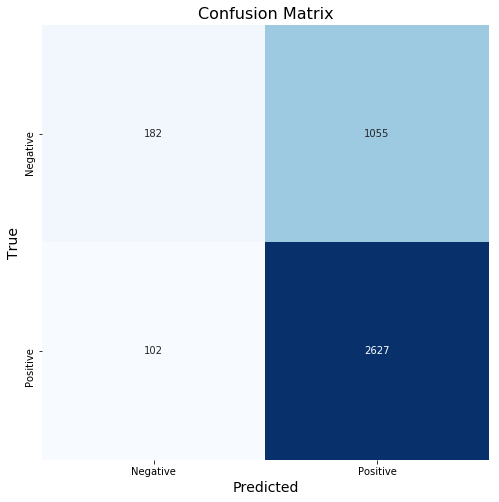

In [89]:
plt.figure(figsize = (8,8))
ax = plt.subplot()
sns.heatmap(cm, 
            annot=True, 
            ax = ax, 
            fmt='g', 
            cbar=False,
            cmap="Blues"); #annot=True to annotate cells

# labels, title and ticks
ax.set_title('Confusion Matrix', size=16)
ax.set_xlabel('Predicted', size=14)
ax.set_ylabel('True', size=14)
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive']);

### ROC Curve and AUC ROC

In [90]:
y_pred_proba = vc.predict_proba(X_test)

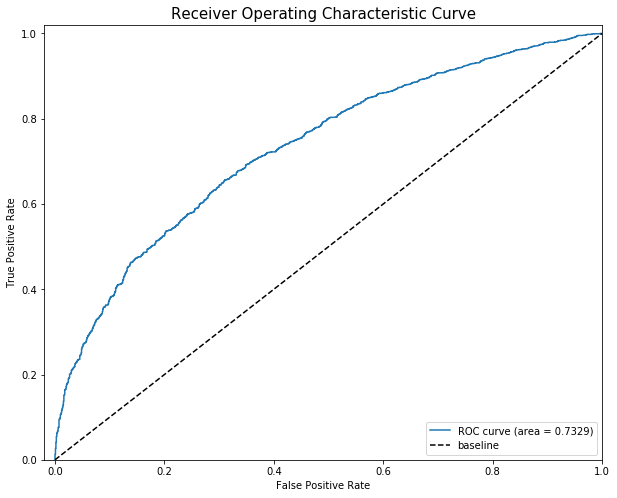

In [91]:
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
fpr, tpr, _= roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(fpr, tpr)


# Plot of a ROC curve for a specific class
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, label='ROC curve (area = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='baseline')
plt.xlim([-0.02, 1.0])
plt.ylim([0.0, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve', fontsize=15)
plt.legend(loc="lower right")